In [322]:
import os
from argparse import Namespace
import json

import pandas as pd
import matplotlib.pyplot as plt
from torch.nn import functional as fnn

from train import main

In [ ]:
#!g1.1

for w, e in [(6, 2), (6, 3)]:

    request = Namespace(
        name=f'resnext50_wing_loss_w{w}_e{e}_CyclicLR_64000_10',
        data_folder='data',
        data_size=64_000,
        crop_size=256,
        batch_size=64,
        epochs=10,
        learning_rate=0.001,
        gpu=True,
        worker=1
    )
    main(request, w, e)

Reading data...


load landmarks...:  80%|████████  | 51336/64000 [00:00<00:00, 512374.66it/s]

Creating model resnext50_32x4d...


load landmarks...: 100%|██████████| 64000/64000 [00:05<00:00, 10810.15it/s] 
Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /tmp/xdg_cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth



Tune optimizer...
Use wing loss!
Ready for training...


validation...:  93%|█████████▎| 186/199 [01:18<00:05,  2.53it/s]

Epoch # 0:	train loss: 6.1e+01	val loss: 1e+02


validation...: 100%|██████████| 199/199 [00:58<00:00,  3.39it/s]


Epoch # 1:	train loss:   7.7	val loss: 3.5e+01


train...:  87%|████████▋ | 686/793 [04:12<00:39,  2.72it/s]

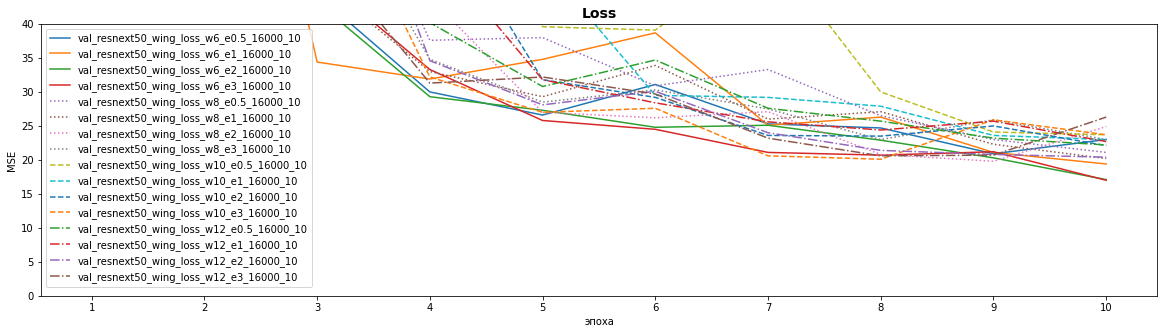

/kernel/lib/python3.7/site-packages/ml_kernel/kernel.py:828: UserWarning: The following variables cannot be serialized: f
  warnings.warn(message)


In [320]:
# figure
plt.figure(figsize=(20, 5)) 
ax = plt.axes() # Add an axes to the current figure and make it the current axes

# for experiment in [
#     'resnext50_wing_loss_w6_e2_16000_10',
#     'resnext50_wing_loss_w6_e3_16000_10',
#     'resnext50_l1_loss_16000_10'
# ]:
    
for w in [6, 8, 10, 12]:
    for e in [0.5, 1, 2, 3]:
        if w==6: ls = 'solid'
        if w==8: ls = 'dotted'
        if w==10: ls = 'dashed'
        if w==12: ls = 'dashdot'
        experiment=f'resnext50_wing_loss_w{w}_e{e}_16000_10'
    
        with open(f'runs/{experiment}/metrics_{experiment}.txt') as f:
            metrics = json.load(f)

        # data
        x = range(1, len(metrics['val_loss']) + 1)
        #ls = 'solid' if experiment=='resnext50_l1_loss_16000_10' else 'dotted'
        ax.plot(x, metrics['val_loss'], linestyle=ls, label=f'val_{experiment}')

# annotation    
ax.set_title('Loss', fontsize=14, fontweight='bold')
ax.set_xlabel('эпоха')
ax.set_ylabel('MSE')
ax.legend()
ax.set_xticks(range(1, len(metrics['train_loss']) + 1))
_ = ax.set_ylim([0, 40])